In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats


In [2]:
df = pd.read_csv("car.csv")

In [3]:
df.head(5)

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Waranty,Types
0,Hyundai | i20 Active S | TDi | 2015 | Hatchbac...,"रू. 24,75,000रू. 25,00,000",Private Use,Manual2WD,Brown,2015,14,1400,Petrol,42000,NaN,NaN
1,Excellent car on sale (Hyundai),"रू. 7,50,000",NaN,Auto2WD,Light blue,2005,11,1399,Petrol,87412,NaN,NaN
2,TATA 407 Container (Tata),"रू. 7,00,000",NaN,Manual - 2WD,White,2013,NaN,2956,Diesel,60000,NaN,NaN
3,4x4 swaraj Mazda (Mahindra),"रू. 6,00,000",NaN,Manual - 4WD,NaN,2017,NaN,NaN,Diesel,NaN,NaN,NaN
4,i20 Active good for used few time (Hyundai),रू. 375,NaN,Auto - 2WD,white,2019,17,1200,Petrol,2400,NaN,NaN


In [4]:
df.tail(5)

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Waranty,Types
843,Hyundai grand i10 (Hyundai),"रू. 24,50,000",2 years,Manual - 2WD,silver,2020,2025,1200,Petrol,26500,NaN,NaN
844,Well maintained car. Everything is fine. Singl...,"रू. 19,25,000",6 years,Manual2WD,Navy blue,2015,15,1200,Petrol,60000,No,NaN
845,VW Polo 2014 Highline 1200 (Renault),"रू. 19,50,000",7,Manual2WD,Carbon Steel ( Dark Grey),2014,12 to 14,1200,Petrol,60000,NaN,NaN
846,Hyundai i10 magna 2014 (Hyundai),"रू. 17,50,000",NaN,Manual - 2WD,silver,2014,NaN,1200,Petrol,93000,NaN,NaN
847,nissan xtrail 2007 model for sale or exchange ...,"रू. 24,50,000",private use,Auto - 4WD,cream,2007,13,2200,Diesel,60000,no warenty,NaN


In [5]:
df.columns

Index(['Name', 'Price', 'Used For', 'Transmisson', 'Colour', 'Make Year',
       'Mileage', 'Engine (CC)', 'Fuel', 'Kilometer Run', 'Waranty', 'Types'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           848 non-null    object 
 1   Price          848 non-null    object 
 2   Used For       357 non-null    object 
 3   Transmisson    848 non-null    object 
 4   Colour         766 non-null    object 
 5   Make Year      848 non-null    object 
 6   Mileage        458 non-null    object 
 7   Engine (CC)    741 non-null    object 
 8   Fuel           848 non-null    object 
 9   Kilometer Run  706 non-null    object 
 10  Waranty        209 non-null    object 
 11  Types          0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 79.6+ KB


In [7]:
df.isnull().sum()

Name               0
Price              0
Used For         491
Transmisson        0
Colour            82
Make Year          0
Mileage          390
Engine (CC)      107
Fuel               0
Kilometer Run    142
Waranty          639
Types            848
dtype: int64

<Axes: >

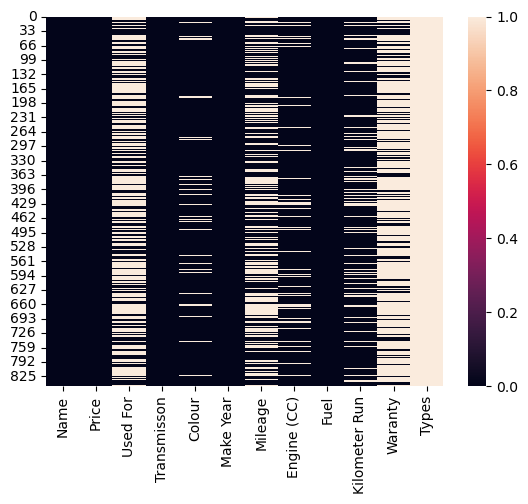

In [8]:
sns.heatmap(df.isnull())

# Data Cleaning

### 1) Remove duplicates

In [9]:
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]

,Name,Price,Used For,Transmisson,Colour,Make Year,Mileage,Engine (CC),Fuel,Kilometer Run,Waranty,Types
745,Tata sumo gold urgent on the (Tata),"रू. 12,00,000",NaN,PowerSteering,NaN,2009,NaN,NaN,Diesel,NaN,NaN,NaN


In [11]:
df = df.drop_duplicates()

### 2) Drop columns with majority null values

In [12]:
df.drop(columns=['Waranty','Types','Used For','Mileage'], inplace=True)

### 3) Replace null values

In [13]:
df[['Engine (CC)','Kilometer Run', 'Make Year']]

,Engine (CC),Kilometer Run,Make Year
0,1400,42000,2015
1,1399,87412,2005
2,2956,60000,2013
3,NaN,NaN,2017
4,1200,2400,2019
...,...,...,...
843,1200,26500,2020
844,1200,60000,2015
845,1200,60000,2014
846,1200,93000,2014


In [14]:
df[['Engine (CC)', 'Kilometer Run','Make Year']] = df[['Engine (CC)', 'Kilometer Run','Make Year']].apply(pd.to_numeric, errors='coerce')

In [15]:
df['Make Year'].fillna(df['Make Year'].mean(), inplace=True)

In [16]:
df['Kilometer Run'].fillna(df['Kilometer Run'].mean(), inplace=True)

In [17]:
df['Engine (CC)'].fillna(df['Engine (CC)'].mode()[0], inplace=True)

In [18]:
df['Colour'].fillna(df['Colour'].mode()[0], inplace=True)

In [19]:
df[['Fuel','Colour']] = df[['Fuel','Colour']].astype('string')

In [20]:
df['Price'] = df['Price'].str.replace('रू.', '').str.replace(',', '')

transformed_array = []
    
for item in df['Price']:
    if ' ' in item:
        split_nums = item.split()
        total_sum = sum(float(num) for num in split_nums)
        average = total_sum / len(split_nums)
        transformed_array.append(str(round(average)))  
    else:
        transformed_array.append(item)
    


In [21]:
df['Price'] = transformed_array

In [22]:
df['Price'] = df['Price'].astype('float64')

In [23]:
np.round(df.describe(),2)

,Price,Make Year,Engine (CC),Kilometer Run
count,847.00,847.00,847.00,847.00
mean,2340804.17,1999.91,1472.81,59069.26
std,2183269.29,160.51,828.33,92551.44
min,375.00,0.00,0.00,0.00
25%,1175000.00,2010.00,1199.50,36045.50
50%,1770000.00,2014.00,1200.00,55700.00
75%,2672500.00,2017.00,1591.00,62000.00
max,24000000.00,2069.00,15000.00,1700000.00


In [24]:
df = df[df['Price'] > 100000]
df = df[(df['Make Year'] > 1970) & (df['Make Year'] < 2024)]
df = df[(df['Engine (CC)'] > 600) & (df['Engine (CC)'] < 6000) ]

In [25]:
median_per_year = df.groupby('Make Year')['Kilometer Run'].median()

def fix_kilometer_run(row):
    if row['Kilometer Run'] < 10000 or row['Kilometer Run'] > 500000:
        year = row['Make Year']
        median_km = median_per_year.get(year)
        if median_km:
            return median_km
    return row['Kilometer Run']


In [26]:
df['Kilometer Run'] = df.apply(fix_kilometer_run, axis=1)

### 4) Extract Brand Name from Name column 

In [27]:
df['Brand'] = df['Name'].str.extract(r'\((.*?)\)')

### 5) Group Transmission  

In [28]:
df['Transmisson'].unique()

array(['Manual2WD', 'Auto2WD', 'Manual - 2WD', 'Manual - 4WD', 'Auto4WD',
       'Manual4WD', 'Auto - 2WD', 'Auto - 4WD', 'PowerSteering',
       'Power Steering'], dtype=object)

In [29]:
df['Transmisson'] = df['Transmisson'].str.lower()

In [30]:
df['Transmisson'] = df['Transmisson'].replace({
    'manual - 2wd': 'Manual-2WD',
    'auto - 2wd': 'Automatic-2WD',
    'auto2wd': 'Automatic-2WD',
    'manual2wd': 'Manual-2WD',
    'auto4wd': 'Automatic-4WD',
    'manual4wd': 'Manual-4WD',
    'manual - 4wd': 'Manual-4WD',
    'auto - 4wd': 'Automatic-4WD',
    'powersteering': 'power steering',
})

In [31]:
df[['Transmisson','Brand']] = df[['Transmisson','Brand']].astype('string')

In [32]:
df.dtypes

Name                     object
Price                   float64
Transmisson      string[python]
Colour           string[python]
Make Year               float64
Engine (CC)             float64
Fuel             string[python]
Kilometer Run           float64
Brand            string[python]
dtype: object

# Univariate Analysis for categorical values

In [33]:
#filtered_df.info()

In [34]:
#filtered_df.isnull().sum()

In [35]:
#np.round(filtered_df.describe())

### 1) Brand

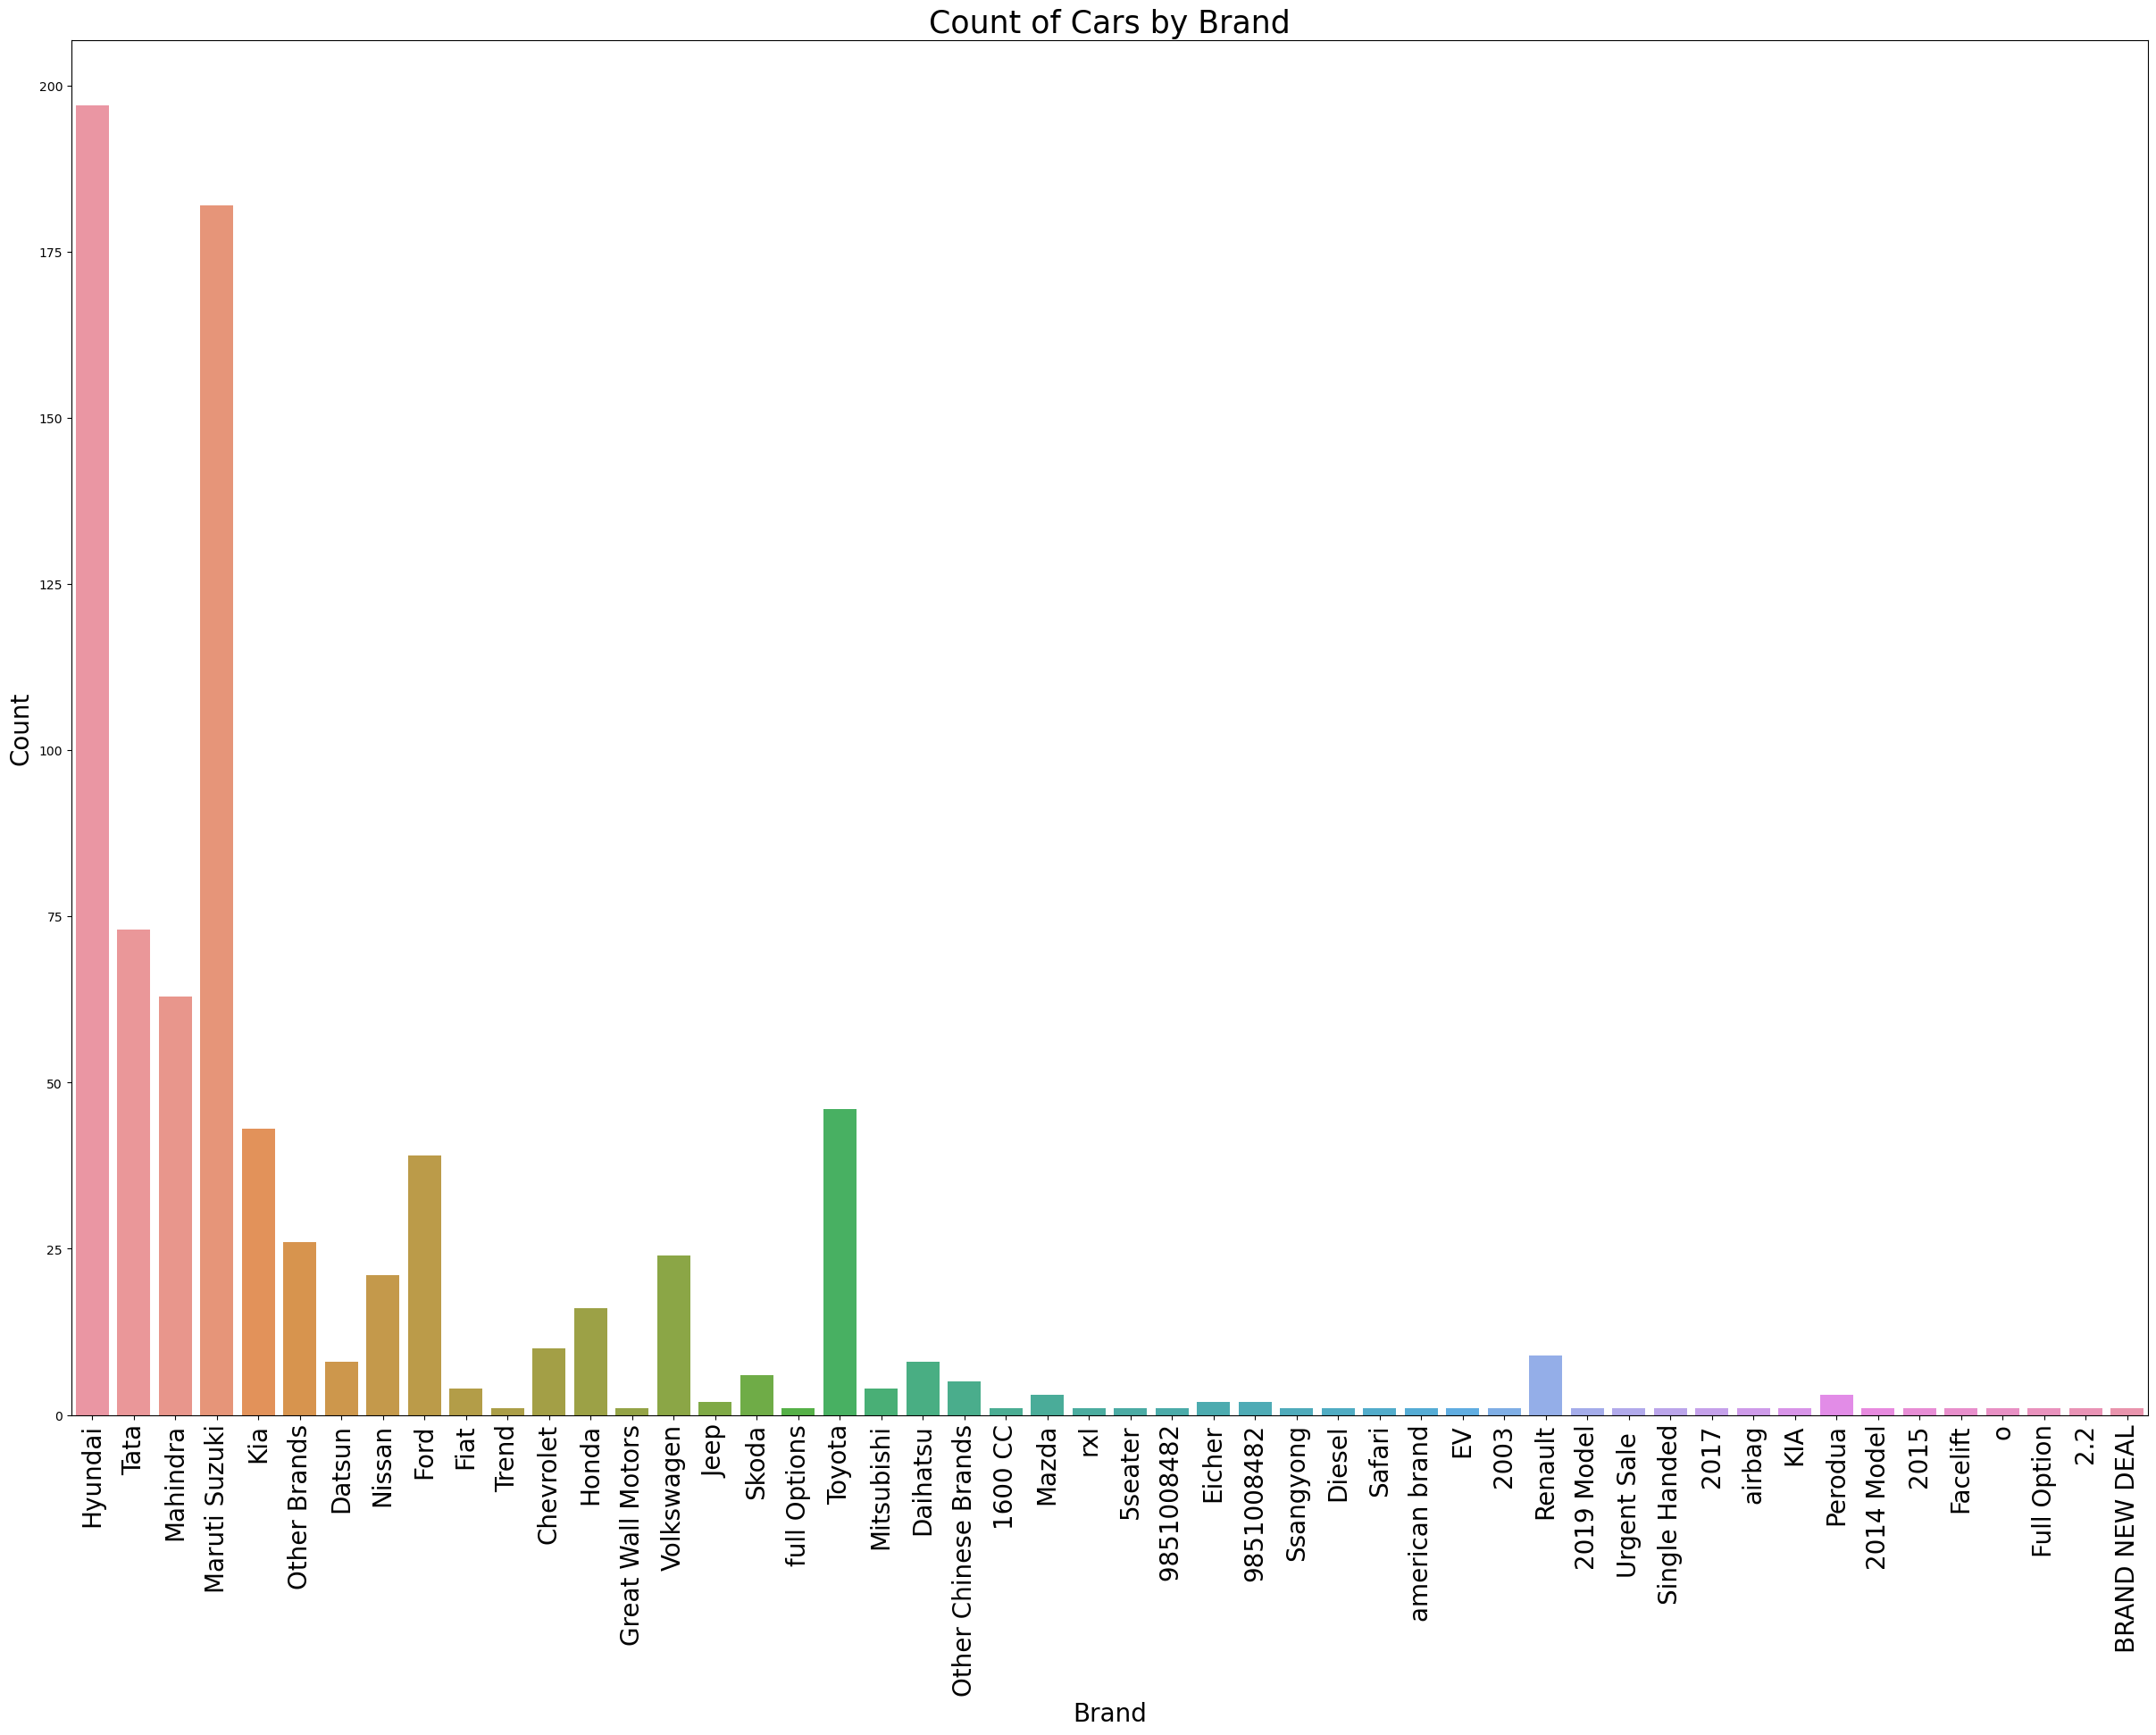

In [36]:
plt.figure(figsize=(30,20))
ax = sns.countplot(data=df, x='Brand')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20) 
plt.title('Count of Cars by Brand', fontsize=25) 
plt.xlabel('Brand', fontsize=20)  
plt.ylabel('Count', fontsize=20) 
plt.xticks(rotation=90)
plt.show()

#### * Remove values that occur only once and drop null values

In [37]:
brand_counts = df['Brand'].dropna().value_counts()

single_occurrence_brands = brand_counts[brand_counts == 1].index

filtered_df = df[~df['Brand'].isin(single_occurrence_brands)]



In [38]:
filtered_df = filtered_df.dropna(subset=['Brand']).copy()

In [39]:
filtered_df['Brand'].unique()

<StringArray>
[             'Hyundai',                 'Tata',             'Mahindra',
        'Maruti Suzuki',                  'Kia',         'Other Brands',
               'Datsun',               'Nissan',                 'Ford',
                 'Fiat',            'Chevrolet',                'Honda',
           'Volkswagen',                 'Jeep',                'Skoda',
               'Toyota',           'Mitsubishi',             'Daihatsu',
 'Other Chinese Brands',                'Mazda',               'Eicher',
           '9851008482',              'Renault',              'Perodua']
Length: 24, dtype: string

#### * Filter data containg only numbers

In [40]:
filtered_df = filtered_df[~filtered_df['Brand'].str.match(r'^\d+$')]

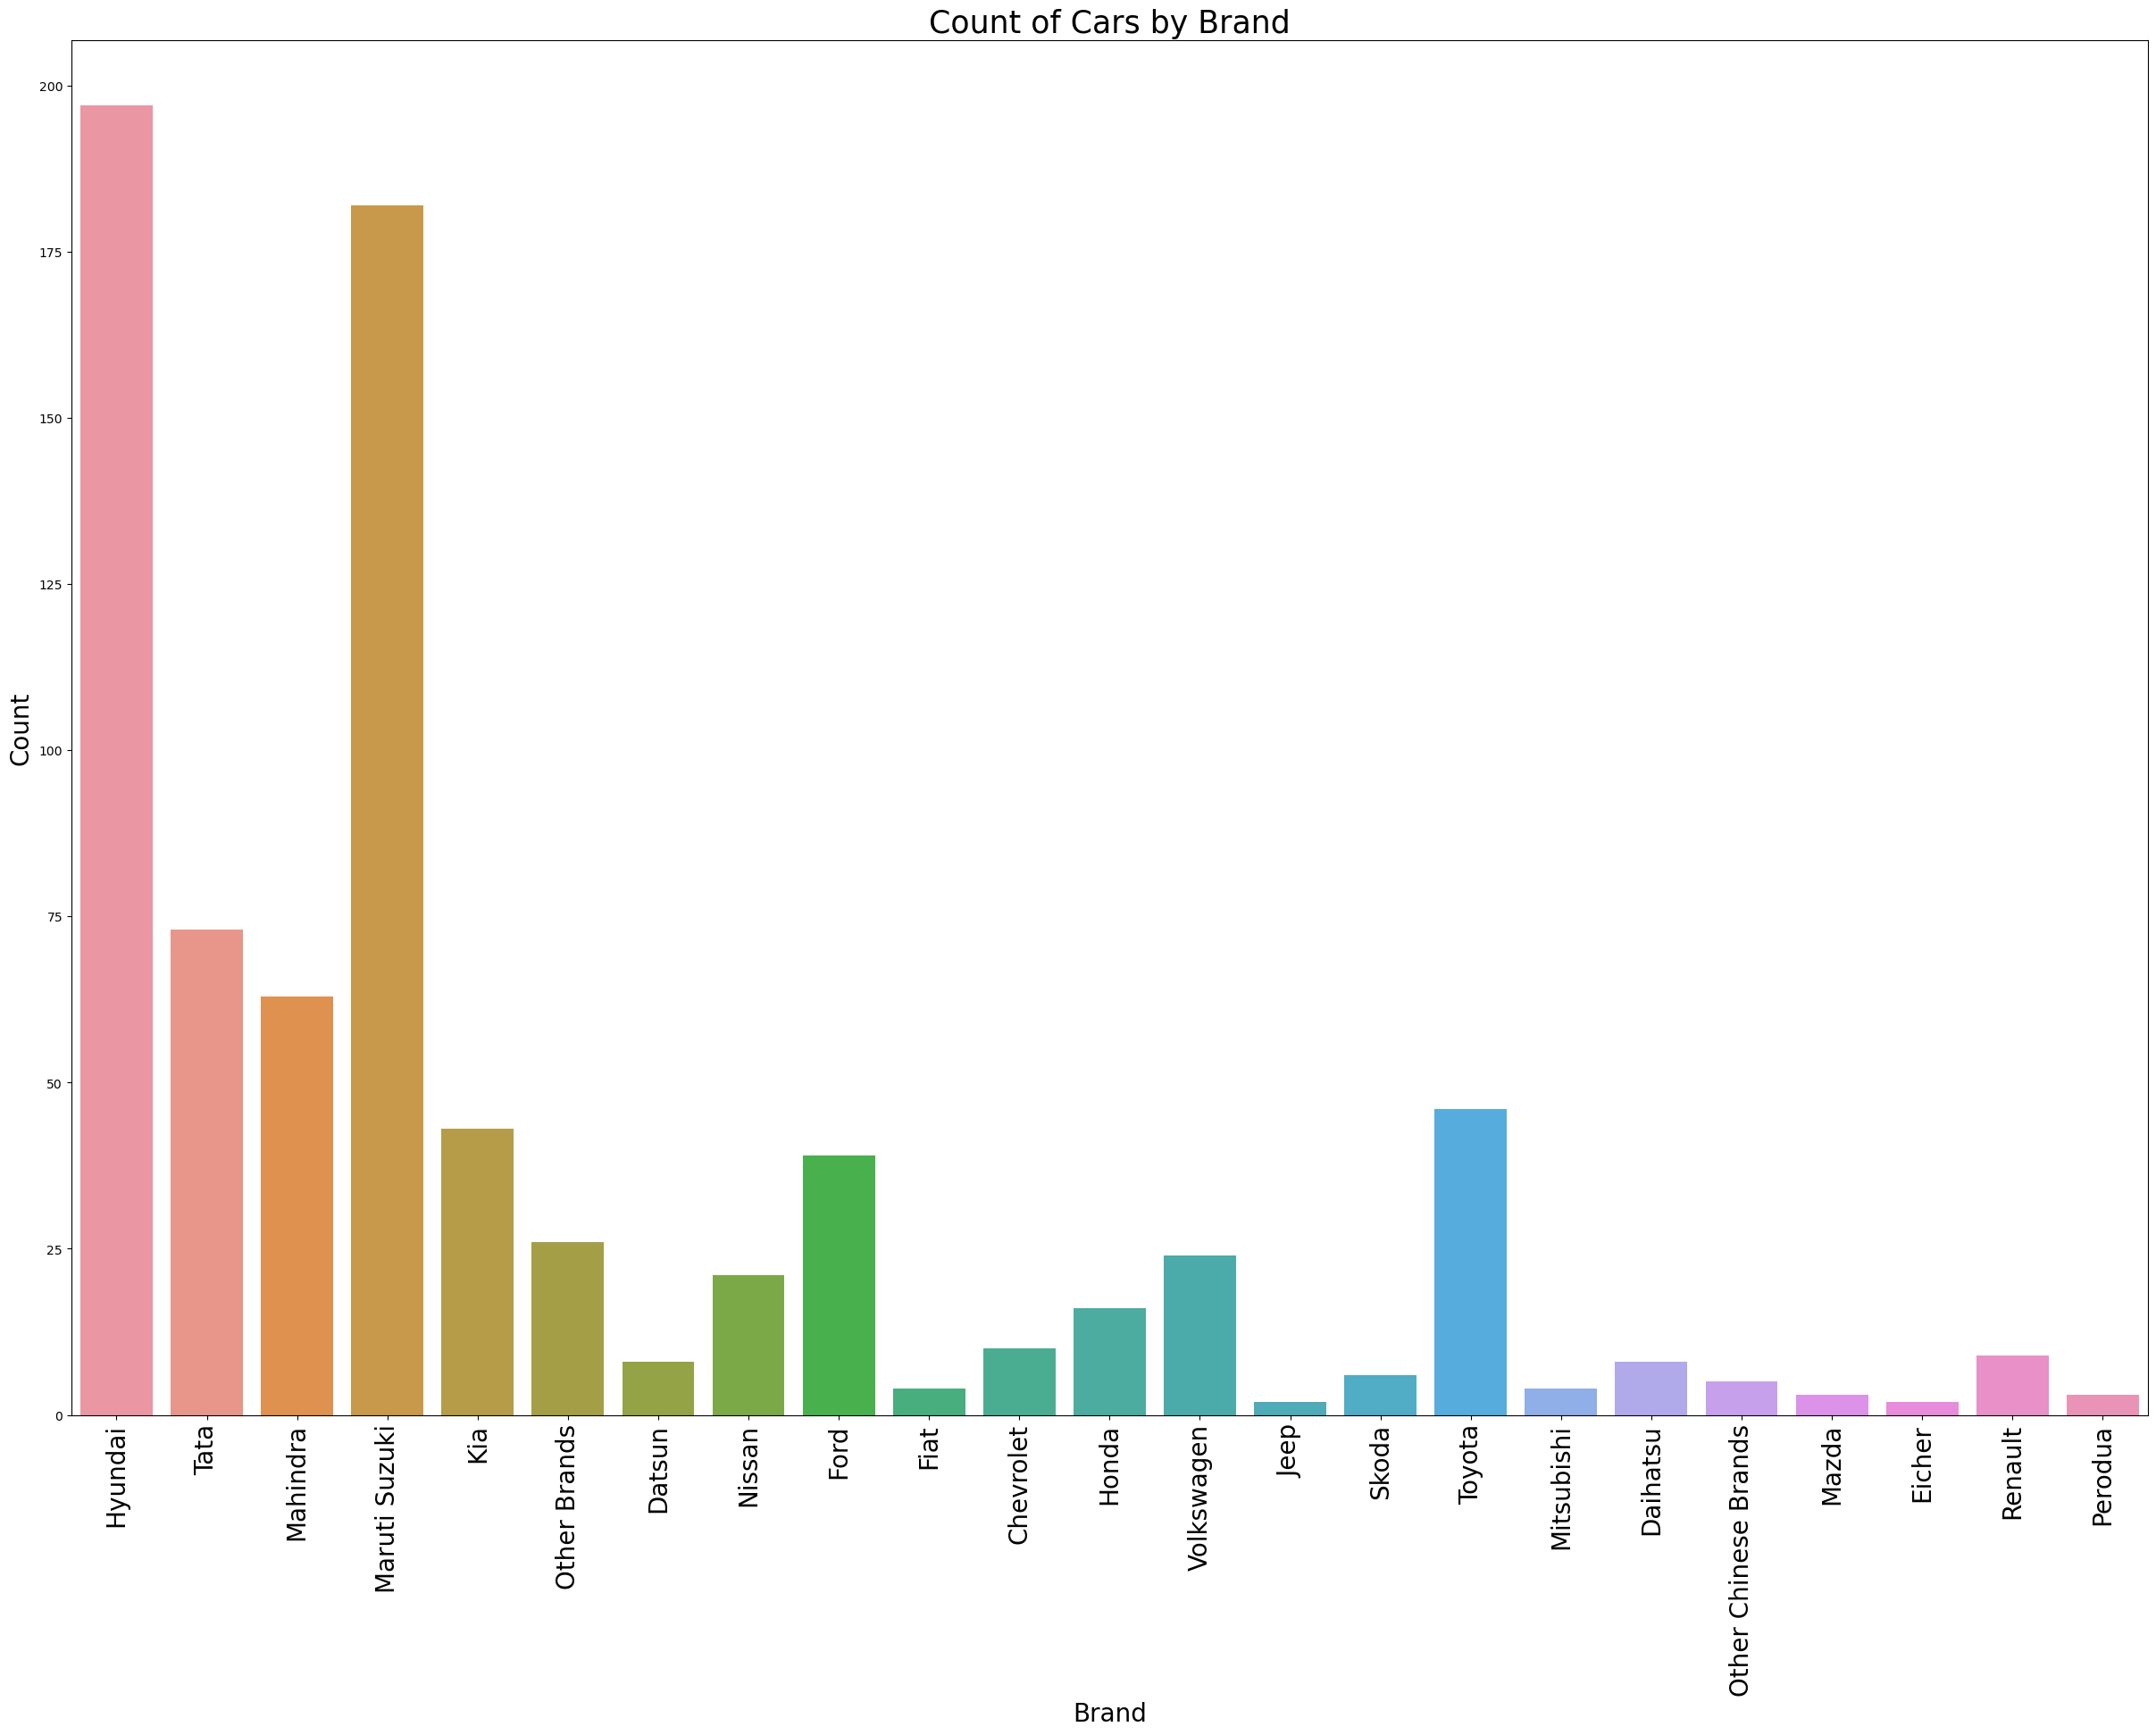

In [41]:
plt.figure(figsize=(30,20))
ax = sns.countplot(data=filtered_df, x='Brand')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
plt.title('Count of Cars by Brand', fontsize=25) 
plt.xlabel('Brand', fontsize=20)  
plt.ylabel('Count', fontsize=20)  
plt.xticks(rotation=90)
plt.show()

# 2) Transmission

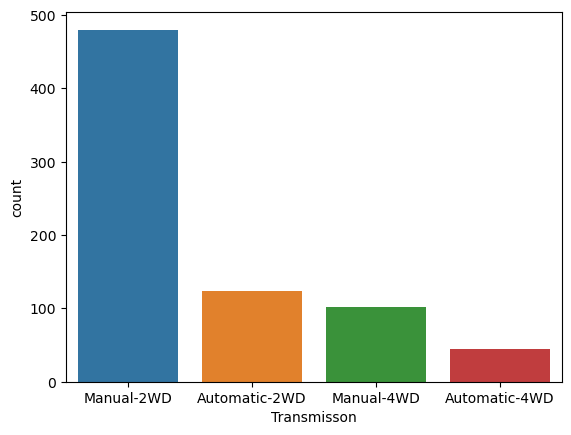

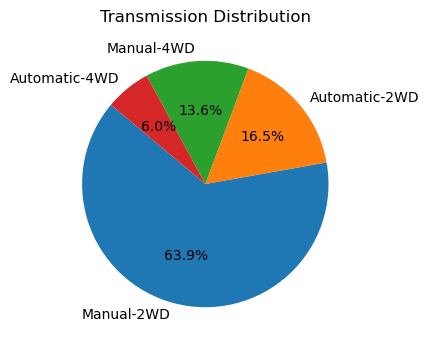

In [55]:
sns.countplot(data=filtered_df, x='Transmisson')

transmission_counts = filtered_df['Transmisson'].value_counts()

plt.figure(figsize=(4, 4)) 
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Transmission Distribution')
plt.show()

In [43]:
filtered_df = filtered_df[filtered_df['Transmisson'] != 'power steering']

# Fuel Type

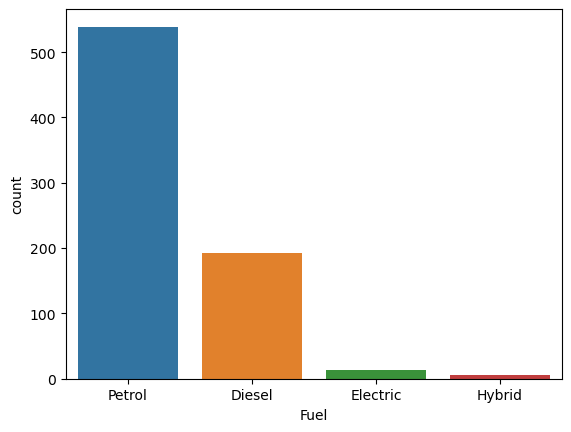

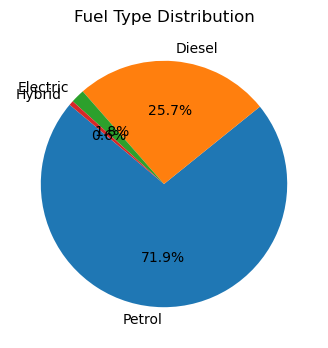

In [44]:
sns.countplot(data=filtered_df, x='Fuel')

fuel_counts = df['Fuel'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(fuel_counts,labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.show()

## Findings

1) Hyundai and Maruti suzuki are the most listed car brands in the website.
2) Most people prefer to buy petrol cars having more than 71% share.
3) There are a lot of manual-2WD in the market with over 60% of the share.

# Univariate analysis for numerical values

In [45]:
# Select numerical columns
numeric_features = filtered_df.select_dtypes(include=['float64', 'int64'])


C:\Users\user\AppData\Local\Temp\ipykernel_15252\2168031458.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_15252\2168031458.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\user\AppData\Local\Temp\ipykernel_15252\2168031458.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

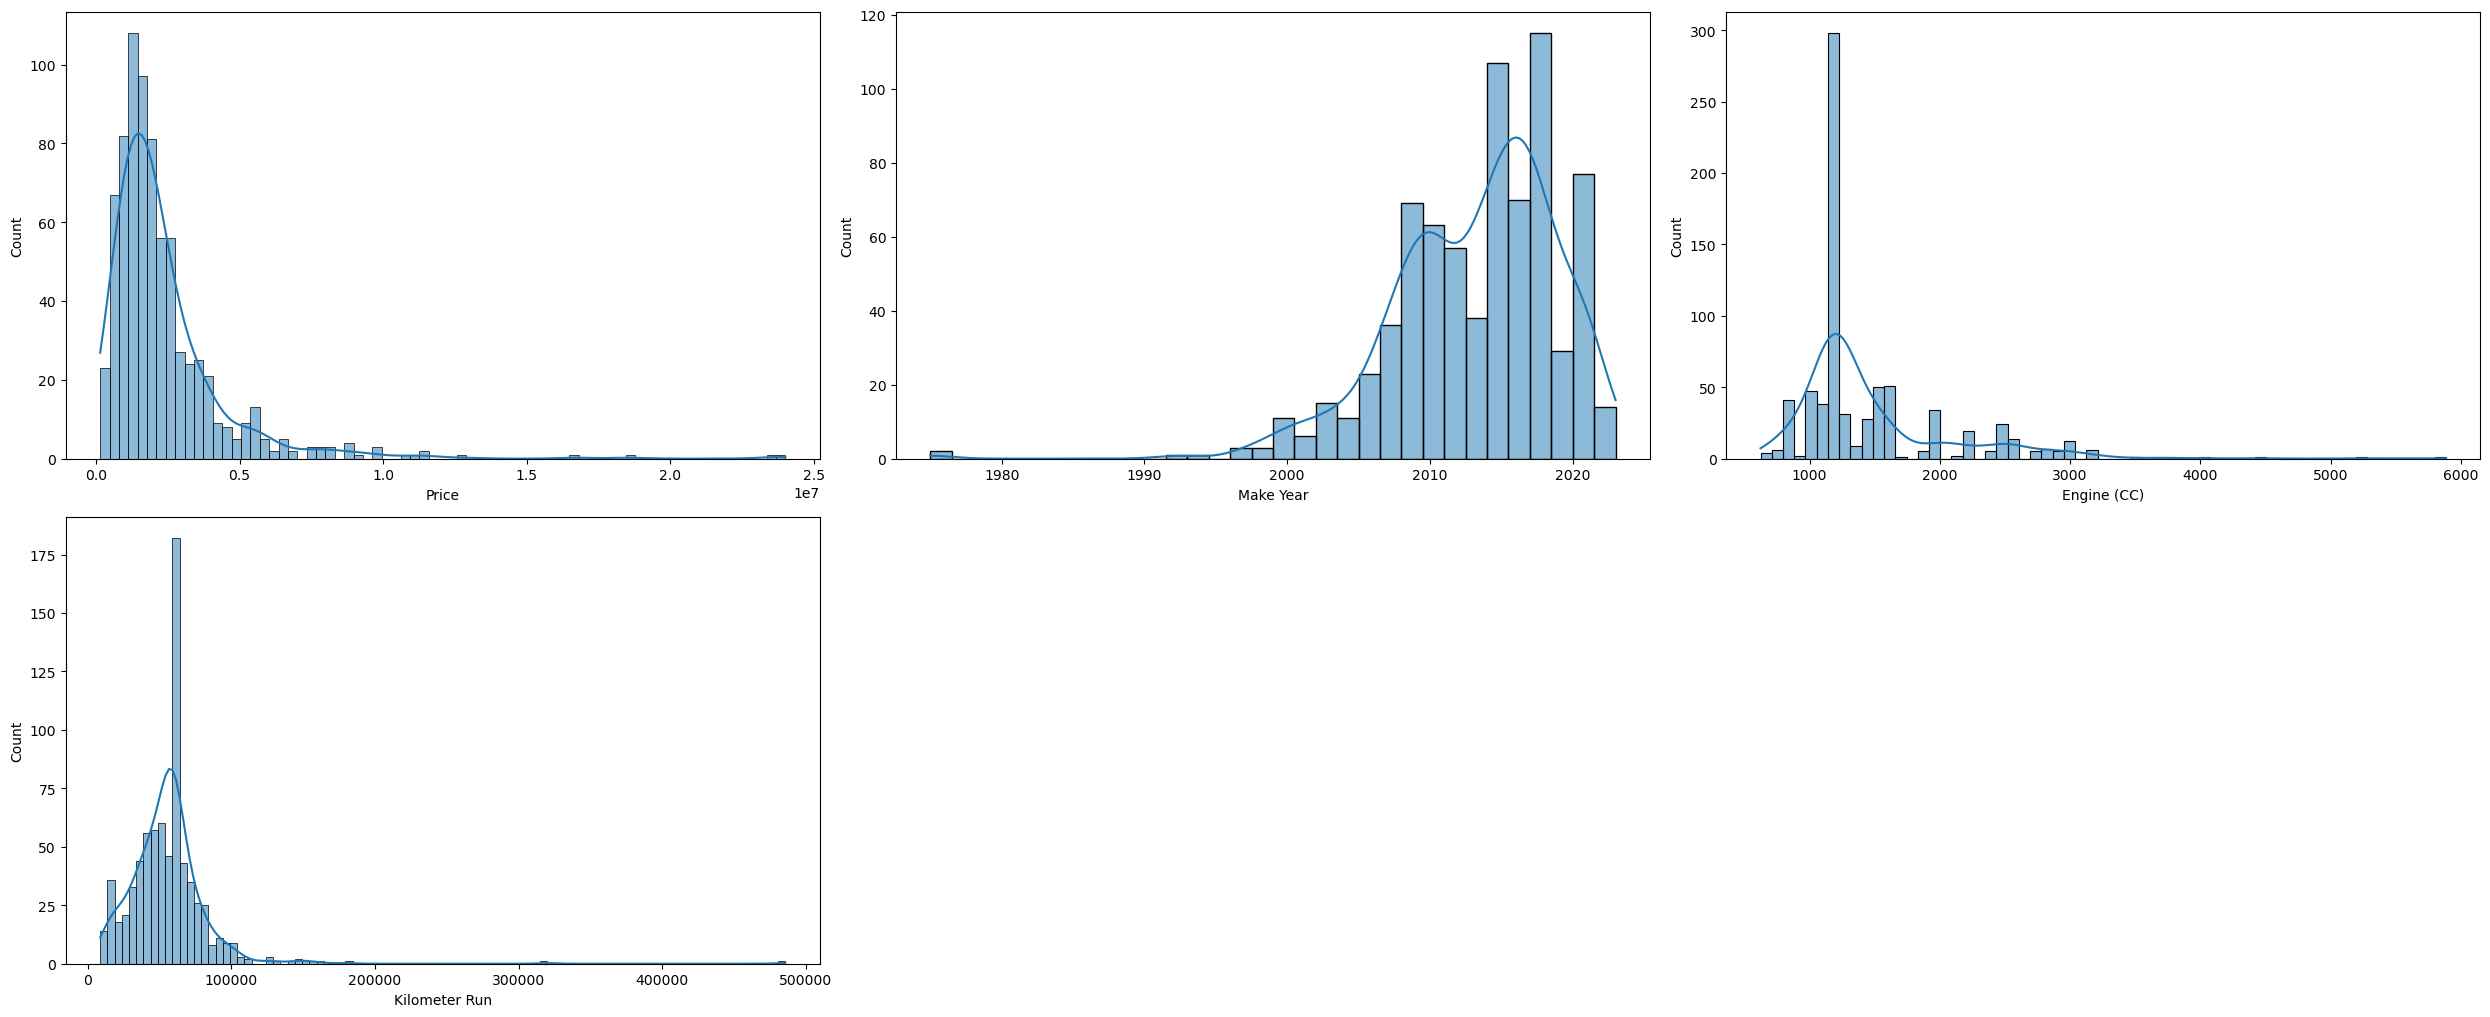

In [46]:
plt.suptitle('Univariate Analysis of Nuerical Resources',fontsize=20,alpha=0.8,y=1)
plt.figure(figsize=(25,25))

for i, col in enumerate(numeric_features.columns):
    plt.subplot(5,3,i+1)
    sns.histplot(data=filtered_df[col],kde=True)
    plt.xlabel(col)
    plt.tight_layout()


# Bivariate Analysis

Text(0.5, 1.0, 'Kilometer Run vs Price')

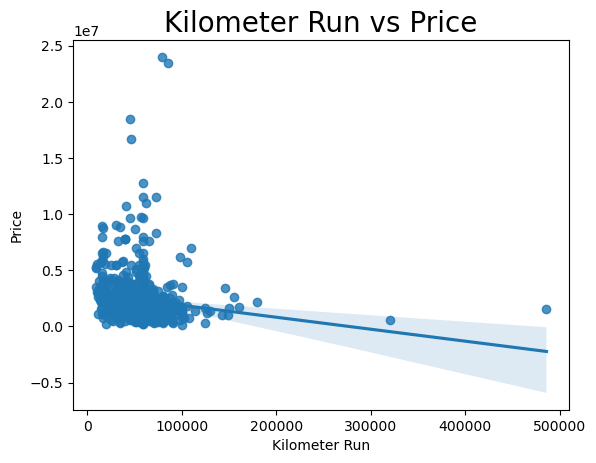

In [47]:
sns.regplot(data=filtered_df, x='Kilometer Run', y='Price')
plt.title('Kilometer Run vs Price', fontsize=20)

Text(0.5, 1.0, 'Make year vs Price')

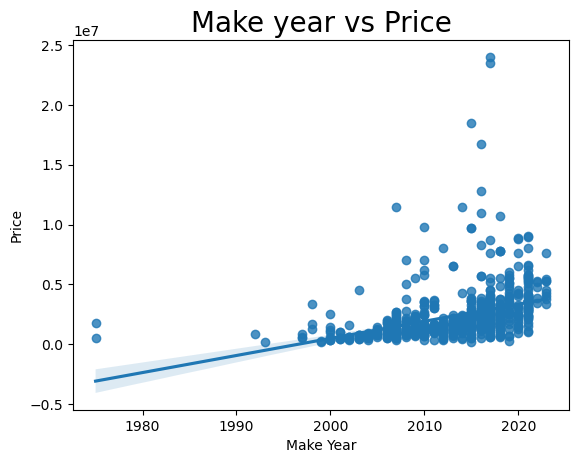

In [48]:
sns.regplot(data=filtered_df, x='Make Year', y='Price')
plt.title('Make year vs Price',fontsize=20)

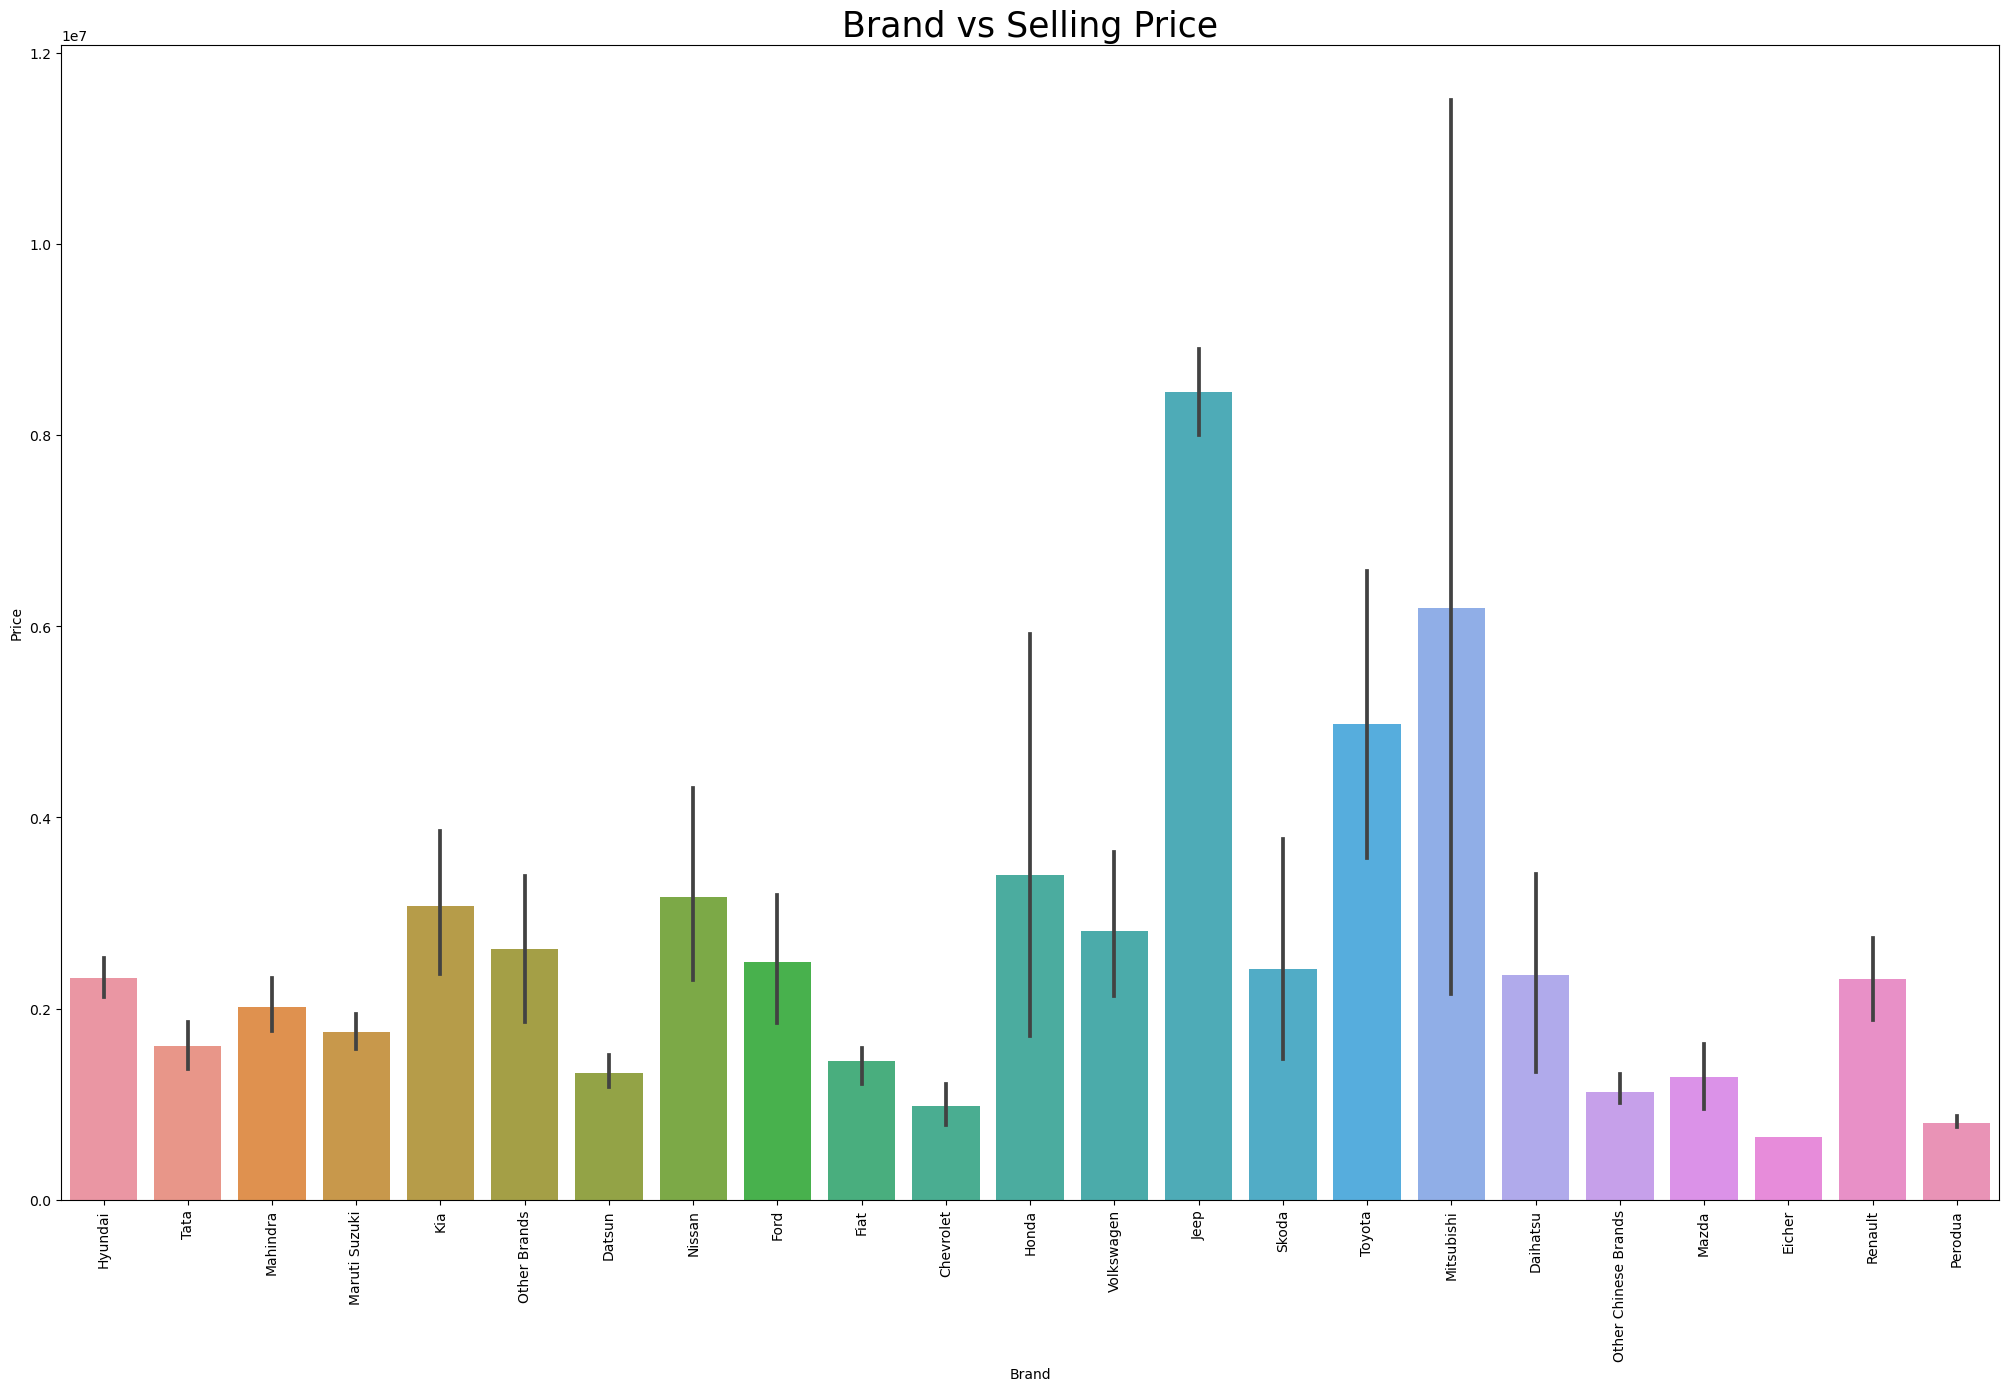

In [49]:
plt.figure(figsize=(25,15))

sns.barplot(x=filtered_df['Brand'],y=filtered_df['Price'])
plt.title('Brand vs Selling Price',fontweight=500,fontsize=25)
plt.xticks(rotation=90)
plt.show()

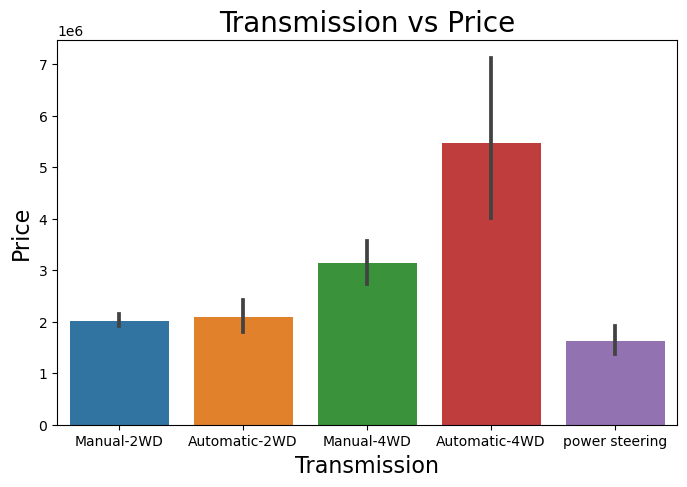

In [50]:
plt.figure(figsize=(8,5))

sns.barplot(x=df['Transmisson'],y=df['Price'])
plt.title('Transmission vs Price',fontsize=20,fontweight=500)
plt.xlabel('Transmission',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.show()

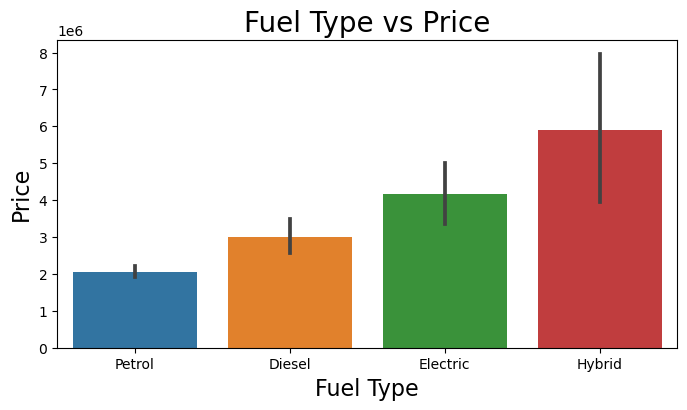

In [51]:
plt.figure(figsize=(8,4))

sns.barplot(x=filtered_df['Fuel'],y=filtered_df['Price'])
plt.title('Fuel Type vs Price',fontsize=20,fontweight=500)
plt.xlabel('Fuel Type',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.show()

# Findings

1) Jeep is the most expensive car brand in the website.
2) Cars having hybrid fuel systems are most expensive.
3) Vehicles having manual-2WD and automatic-2WD are similarly prices wheras vehicles with automatic-4WD are comparitively more expensive then vehicles with manual-4WD transmission system.
4) Cars that are less km run have more selling prices.

# Multivariate analysis

In [52]:
numeric_columns = filtered_df.select_dtypes(include='number')
correlation_matrix = np.round(numeric_columns.corr(), 2)

In [53]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_df = df[numeric_columns]
correlation_matrix = np.round(numeric_df.corr(),2)
print(correlation_matrix)

               Price  Make Year  Engine (CC)  Kilometer Run
Price           1.00       0.38         0.36          -0.15
Make Year       0.38       1.00         0.03          -0.40
Engine (CC)     0.36       0.03         1.00           0.15
Kilometer Run  -0.15      -0.40         0.15           1.00


<Axes: >

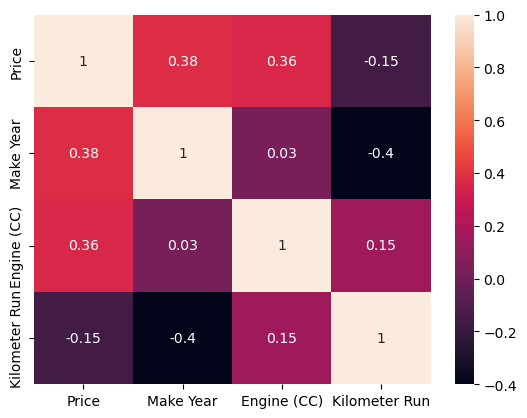

In [54]:
sns.heatmap(correlation_matrix,annot=True)